<h1><div style="text-align: center"> Human Activity Recognition using Machine Learning </div></h1> 

## Contents
<h3>1. Data Description </h3> 
 --- (1) Feature Description<br />
 --- (2) Class Description<br />
 
&ast; Baseline performance measure
<h3>2. Preprocessing </h3> 

<h3>3. Feature Selection </h3> 
 --- (1) RFECV (wrapper method)<br />
 --- (3) Embedded method<br />
 <h3>4. Model selection</h3> 
 --- (1) Basic classifiers (Decision Tree, KNN, MLP, SVM)<br />
 --- (2) Ensemble (RandomForest, Bagging, Boosting, Stacking)<br />
<br /><br />

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize

from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

%matplotlib inline

## 1. Data Description

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years.<br />
Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist.<br />
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [6]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [7]:
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
X = data.iloc[:,:-2] # features
y = data.iloc[:,-1]  # class

X_test = test_data.iloc[:,:-2] # features
y_test = test_data.iloc[:,-1]  # class

### 1 - (1) Feature Description

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [10]:
feature_names = X.columns

Total number of features : 561, including<br />
triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration,<br />
triaxial Angular velocity from the gyroscope,<br />
a 561-feature vector with time and frequency domain variables.

### 1 - (2) Class Description
Activity class<br />
6 classes : WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING <br />

In [44]:
data.Activity.unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [45]:
class_names = ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

In [46]:
y.value_counts()

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

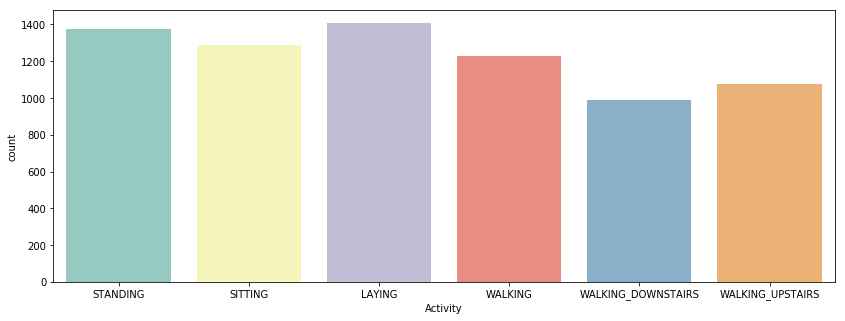

In [49]:
plt.figure(figsize=(14,5))
ax = sns.countplot(y, label = "Count", palette = "Set3")
LAYING, STANDING, SITTING, WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS = y.value_counts()

### &ast; Baseline performance measure


Dummy classifier is used to measure baseline performance.<br />
DummyClassifier is a classifier that makes predictions using simple rules.<br />
Below are the baseline performance using "most_frequent" strategy.<br />
The model that will be developed later on should show better performance than this.<br />

In [50]:
dummy_classifier = DummyClassifier(strategy="most_frequent")
y_pred = dummy_classifier.fit(X, y).predict(X_test)
dummy_classifier.score(X_test, y_test)

0.18221920597217509

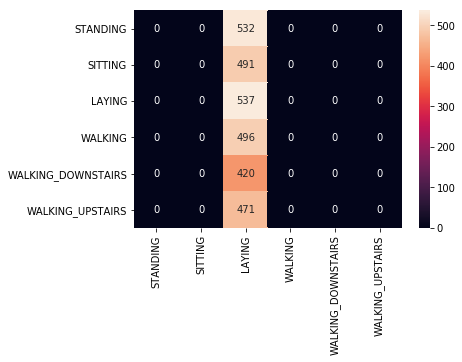

In [51]:
cm = confusion_matrix(y_test, dummy_classifier.predict(X_test), labels = class_names)
sns.heatmap(cm, annot=True, fmt="d", xticklabels = class_names, yticklabels = class_names)

The most frequent class in this training set is LAYING. <br />
When you classify every instance in the training set into LAYING class, the accuracy is about 18.2%.

## 2. Preprocessing

We don't need one-hot encoding here since all the features we've got are numerical values.<br />
Also, no scaling is needed since all the values are already normalized within the range between -1 and 1.

## 3. Feature Selection

Sometimes, it's better to use only some of the given features.<br />
Too many features cause high complexity and overfitting!<br />

There are several feature selection methods,<br />
(1) Feature subset selection,<br />
(2) PCA,<br />

and among feature subset selection methods are filter method, wrapper method, embedded method.

### 3 - (1) RFECV (wrapper method)
Recursive Feature Elimination(RFE) is a wrapper method for feature selection.<br />
RFECV gives feature ranking with recursive feature elimination and the optimal number of features.

In [53]:
rf_for_refcv = RandomForestClassifier() 
rfecv0 = RFECV(estimator = rf_for_refcv, step = 1, cv = 5, scoring = 'accuracy')   #5-fold cross-validation
rfecv0 = rfecv0.fit(X, y)

print('Optimal number of features :', rfecv0.n_features_)
print('Best features :', X.columns[rfecv0.support_])

Optimal number of features : 359
Best features : Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X',
       'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X',
       'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z',
       ...
       'fBodyBodyGyroJerkMag-std()', 'fBodyBodyGyroJerkMag-max()',
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=359)


In [60]:
rfecv_X = X[X.columns[rfecv0.support_]]  # rfecv_X.shape = (7352, 359)
rfecv_X_test = X_test[X.columns[rfecv0.support_]]  # rfecv_X_test.shape = (2947, 359)

### 3 - (2) Embedded method

Embedded method finds the optimal feature subset during model training.<br />
Below is the Random Forest example. Random Forest is an ensemble learning method using multiple decision trees.<br />
Constructed decision tree identifies the most significant variables and it gives us some information about feature importances.

In [63]:
rf_for_emb = RandomForestClassifier()      
rf_for_emb = rf_for_emb.fit(X, y)
importances = rf_for_emb.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_for_emb.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. fBodyAccJerk-bandsEnergy()-1,16.1 (0.059744)
2. angle(X,gravityMean) (0.041564)
3. tGravityAcc-energy()-Y (0.038379)
4. angle(Y,gravityMean) (0.031127)
5. tBodyAcc-correlation()-X,Y (0.025182)
6. tGravityAcc-mean()-Z (0.024143)
7. tGravityAcc-max()-Y (0.022795)
8. tGravityAcc-mean()-Y (0.022411)
9. tBodyAccJerkMag-mean() (0.020459)
10. fBodyAccJerk-bandsEnergy()-1,16 (0.020405)
11. fBodyAcc-sma() (0.020198)
12. fBodyAccJerk-max()-X (0.019989)
13. tBodyAccJerk-mad()-X (0.019986)
14. fBodyAccJerk-bandsEnergy()-1,24 (0.019944)
15. fBodyAccJerk-entropy()-Y (0.019873)
16. tGravityAcc-arCoeff()-X,1 (0.018595)
17. tGravityAcc-arCoeff()-Z,2 (0.017423)
18. tGravityAcc-energy()-Z (0.016781)
19. tGravityAcc-max()-Z (0.015592)
20. tGravityAccMag-std() (0.014618)
21. tGravityAcc-mean()-X (0.014378)
22. angle(Z,gravityMean) (0.014138)
23. tGravityAcc-arCoeff()-Z,3 (0.013803)
24. tGravityAcc-entropy()-Y (0.013607)
25. tGravityAcc-arCoeff()-Y,1 (0.013434)
26. tGravityAccMag-arCoeff

In [65]:
indices

array([403, 558,  57, 559,  37,  42,  50,  41, 226, 389, 280, 353,  86,
       393, 367,  65,  74,  58,  51, 214,  40, 560,  75,  63,  69, 222,
       271, 504,  16,  53, 371,  56, 314, 215,  49,  39, 139, 203, 381,
        52,  54,  70, 274, 213, 339, 508, 472,  67,  77, 281,  71,  46,
        55, 503, 123, 129, 426, 451, 302,  72,   9, 209, 126, 163, 179,
       299, 470, 134, 460,  66, 441, 142, 117, 502, 128,  62, 185, 458,
       507, 127, 345, 538, 145, 418, 432, 160, 132, 474,  22, 282, 526,
       201, 102,  59, 468, 316, 497, 429, 434, 176, 333, 268,  91, 199,
       276, 295, 187, 423, 159, 205,   3, 136, 430, 172, 158, 433, 505,
       459, 210, 202, 120, 137, 450, 166,  78,  76, 501, 500, 543, 143,
        68, 153,  38, 189, 131, 269, 324, 180, 118, 332, 516, 197, 456,
       362, 342,  73, 443, 228,   7, 292, 352, 540,  60, 234, 252,  96,
       267, 374, 344, 462, 229, 439, 265, 486, 298, 417, 464,  87, 527,
       493, 144, 487,  19, 105, 512, 552, 218, 178, 259, 233, 37

In [72]:
h_indices = indices[:100]  # 100 best features
th_indices = indices[:300]  # 300 best features

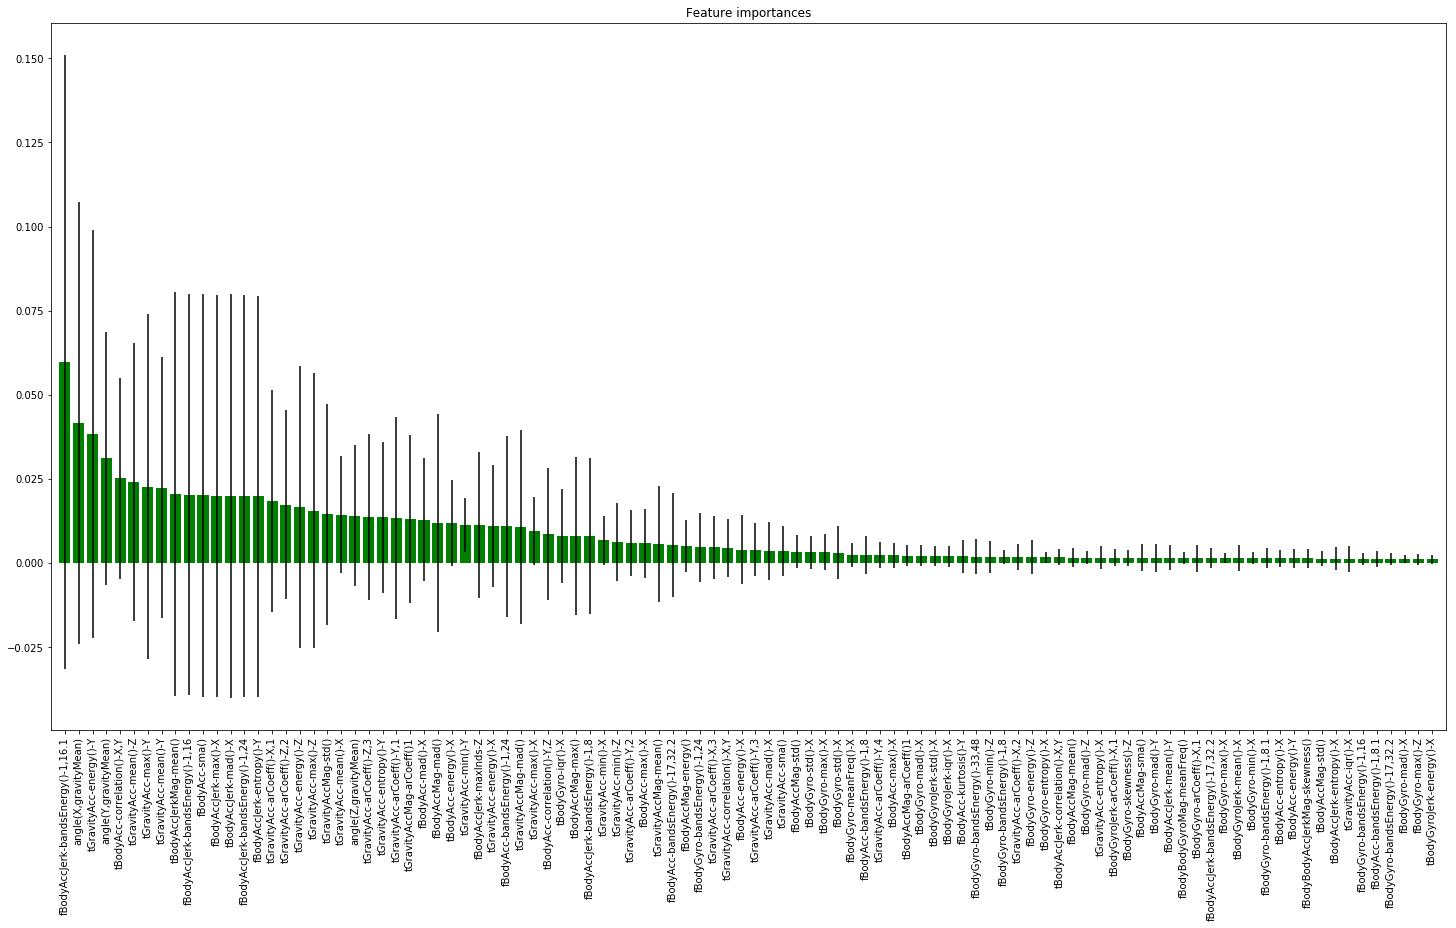

In [74]:
plt.figure(1, figsize=(25, 13))
plt.title("Feature importances")
plt.bar(range(100), importances[h_indices], color="g", yerr=std[h_indices], align="center")
plt.xticks(range(100), X.columns[h_indices],rotation=90)
plt.xlim([-1, 100])
plt.show()

In [75]:
hundred_X = X[X.columns[h_indices]]
hundred_X_test = X_test[X.columns[h_indices]]

threeh_X = X[X.columns[th_indices]]
threeh_X_test = X_test[X.columns[th_indices]]

## 4. Model Selection

### 4 - (1) Basic Classifiers (Decision Tree, KNN, MLP, SVM)

In [80]:
decision_tree00 = tree.DecisionTreeClassifier()
dtclf00 = decision_tree00.fit(X, y)
dtclf00.score(X_test, y_test)

0.8578215134034611

In [81]:
decision_tree01 = tree.DecisionTreeClassifier()
dtclf01 = decision_tree01.fit(hundred_X, y)
dtclf01.score(hundred_X_test, y_test)

0.8523922633186292

In [85]:
decision_tree02 = tree.DecisionTreeClassifier()
dtclf02 = decision_tree02.fit(threeh_X, y)
dtclf02.score(threeh_X_test, y_test)

0.8347472005429251

In [83]:
decision_tree03 = tree.DecisionTreeClassifier()
dtclf03 = decision_tree03.fit(rfecv_X, y)
dtclf03.score(rfecv_X_test, y_test)

0.8544282321004412

For some reason it doesn't seem like selected features guarantee better performance.

In [86]:
decision_tree04 = tree.DecisionTreeClassifier(min_samples_leaf=4)
dtclf04 = decision_tree04.fit(X, y)
dtclf04.score(X_test, y_test)

0.8727519511367492

In [87]:
decision_tree05 = tree.DecisionTreeClassifier(min_samples_leaf=6)
dtclf05 = decision_tree05.fit(X, y)
dtclf05.score(X_test, y_test)

0.8710553104852392

In [90]:
decision_tree06 = tree.DecisionTreeClassifier(min_samples_leaf=6)
dtclf06 = decision_tree06.fit(rfecv_X, y)
dtclf06.score(rfecv_X_test, y_test)

0.8778418730912793

In [91]:
decision_tree07 = tree.DecisionTreeClassifier(min_samples_leaf=6)
dtclf07 = decision_tree07.fit(threeh_X, y)
dtclf07.score(threeh_X_test, y_test)

0.8456057007125891

It shows slightlly better performances when 'min_samples_leaf' is 6.


This code shows how the testing accuracy varies when K changes.

Text(0,0.5,'Testing Accuracy')

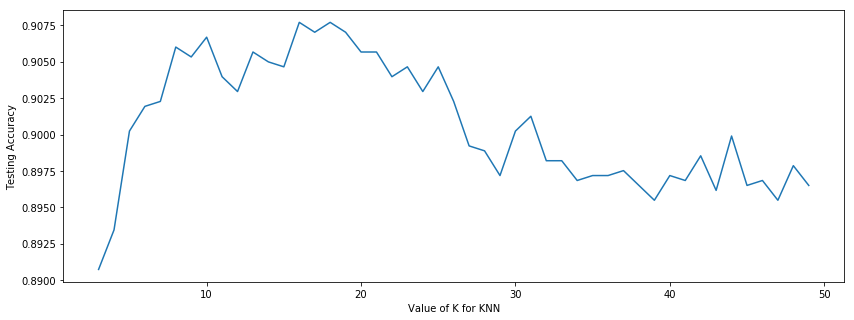

In [92]:
k_range = range(3, 50)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knnclf = knn.fit(X, y)
    scores.append(knnclf.score(X_test, y_test))

plt.figure(figsize=(14,5))
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [93]:
knn0 = KNeighborsClassifier(n_neighbors = 18)
knnclf0 = knn0.fit(X, y)
knnclf0.score(X_test, y_test)

0.9077027485578555

In [94]:
knn1 = KNeighborsClassifier(n_neighbors = 19)
knnclf1 = knn1.fit(threeh_X, y)
knnclf1.score(threeh_X_test, y_test)

0.9165252799457075

In [97]:
knn2 = KNeighborsClassifier(n_neighbors = 28)
knnclf2 = knn2.fit(rfecv_X, y)
knnclf2.score(rfecv_X_test, y_test)

0.9148286392941974

In [98]:
mlp0 = MLPClassifier(hidden_layer_sizes=(15, 15))
mlp0 = mlp0.fit(X, y)
mlp0.score(X_test, y_test)

0.9514760773668137

In [104]:
mlp1 = MLPClassifier(hidden_layer_sizes=(15, 15))
mlp1 = mlp1.fit(rfecv_X, y)
mlp1.score(rfecv_X_test, y_test)

0.9277231082456736

In [100]:
mlp2 = MLPClassifier(hidden_layer_sizes=(15, 15))
mlp2 = mlp2.fit(rfecv_X, y)
mlp2.score(rfecv_X_test, y_test)

0.9392602646759416

In [101]:
mlp3 = MLPClassifier(hidden_layer_sizes=(15, 15, 15))
mlp3 = mlp3.fit(X, y)
mlp3.score(X_test, y_test)

0.9453681710213777

In [102]:
mlp4 = MLPClassifier(hidden_layer_sizes=(20, 20))
mlp4 = mlp4.fit(X, y)
mlp4.score(X_test, y_test)

0.9487614523243977

In [103]:
mlp5 = MLPClassifier(hidden_layer_sizes=(30, 30))
mlp5 = mlp5.fit(X, y)
mlp5.score(X_test, y_test)

0.9423142178486597

In [105]:
svcclf0 = SVC()
svcclf0 = svcclf0.fit(X, y)
svcclf0.score(X_test, y_test)

0.9402782490668476

In [106]:
svcclf1 = SVC()
svcclf1 = svcclf1.fit(hundred_X, y)
svcclf1.score(hundred_X_test, y_test)

0.9209365456396336

In [107]:
svcclf2 = SVC()
svcclf2 = svcclf2.fit(threeh_X, y)
svcclf2.score(threeh_X_test, y_test)

0.9379029521547336

In [108]:
svcclf3 = SVC()
svcclf3 = svcclf3.fit(rfecv_X, y)
svcclf3.score(rfecv_X_test, y_test)

0.9402782490668476

This part is from https://www.kaggle.com/pradeepb/using-neural-networks-in-tensorflow.<br />
The number of classes(output layer) is 6, which means the label 'Activity' needs one-hot encoding.

In [109]:
onehoty = pd.get_dummies(y, prefix='Activity', columns=['Activity'])
onehoty_test = pd.get_dummies(y_test, prefix='Activity', columns=['Activity'])

In [110]:
import tensorflow as tf

n_nodes_input = 561 # number of input features
n_nodes_hl = 30     # number of units in hidden layer
n_classes = 6       # number of activities
a = tf.placeholder('float', [None, 561])
b = tf.placeholder('float')

def neural_network_model(data):
    # define weights and biases for all each layer
    hidden_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_input, n_nodes_hl], stddev=0.3)),
                      'biases':tf.Variable(tf.constant(0.1, shape=[n_nodes_hl]))}
    output_layer = {'weights':tf.Variable(tf.truncated_normal([n_nodes_hl, n_classes], stddev=0.3)),
                    'biases':tf.Variable(tf.constant(0.1, shape=[n_classes]))}
    # feed forward and activations
    l1 = tf.add(tf.matmul(data, hidden_layer['weights']), hidden_layer['biases'])
    l1 = tf.nn.sigmoid(l1)
    output = tf.matmul(l1, output_layer['weights']) + output_layer['biases']
    
    return output

def train_neural_network(a):
    prediction = neural_network_model(a)
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=b,logits=prediction))
    optimizer = tf.train.AdamOptimizer().minimize(cost)
    
    sess = tf.InteractiveSession()
    tf.global_variables_initializer().run()
    for epoch in range(1000):
        loss = 0
        _, c = sess.run([optimizer, cost], feed_dict = {a: X, b: onehoty})
        loss += c
        if (epoch % 100 == 0 and epoch != 0):
            print('Epoch', epoch, 'completed out of', 1000, 'Training loss:', loss)
    correct = tf.equal(tf.argmax(prediction,1), tf.argmax(b,1))
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name='op_accuracy')
    
    print('Train set Accuracy:', sess.run(accuracy, feed_dict = {a: X, b: onehoty}))
    print('Test set Accuracy:', sess.run(accuracy, feed_dict = {a: X_test, b: onehoty_test}))

In [111]:
train_neural_network(a)

Epoch 100 completed out of 1000 Training loss: 0.4001423120498657
Epoch 200 completed out of 1000 Training loss: 0.31283679604530334
Epoch 300 completed out of 1000 Training loss: 0.26118847727775574
Epoch 400 completed out of 1000 Training loss: 0.22288982570171356
Epoch 500 completed out of 1000 Training loss: 0.19147826731204987
Epoch 600 completed out of 1000 Training loss: 0.1620955616235733
Epoch 700 completed out of 1000 Training loss: 0.13949739933013916
Epoch 800 completed out of 1000 Training loss: 0.12147626280784607
Epoch 900 completed out of 1000 Training loss: 0.10676330327987671
Train set Accuracy: 0.9632753
Test set Accuracy: 0.94740415


### 4 - (2) Ensemble (RandomForest, Bagging, Boosting, Stacking)

An obvious approach to making decisions more reliable is to combine the output of different models.<br />

RandomForest builds a randomized decision tree. ex) picking one of the N best options at random instead of a single winner.<br />

In [112]:
RFclf0 = RandomForestClassifier()
RFclf0 = RFclf0.fit(X, y)
RFclf0.score(X_test, y_test)

0.9093993892093655

In [115]:
RFclf1 = RandomForestClassifier()
RFclf1 = RFclf1.fit(rfecv_X, y)
RFclf1.score(rfecv_X_test, y_test)

0.9134713267729895

Text(0,0.5,'Testing Accuracy')

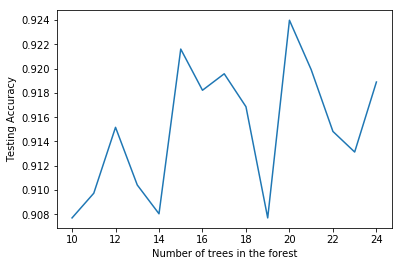

In [116]:
x_range = range(10, 25)
scores2 = []
for x in x_range:
    RFclf2 = RandomForestClassifier(n_estimators = x)
    RFclf2 = RFclf2.fit(X, y)
    scores2.append(RFclf2.score(X_test, y_test))

plt.plot(x_range, scores2)
plt.xlabel('Number of trees in the forest')
plt.ylabel('Testing Accuracy')

In [134]:
RFclf3 = RandomForestClassifier(n_estimators = 20)
RFclf3 = RFclf3.fit(X, y)
RFclf3.score(X_test, y_test)

0.9209365456396336

In [135]:
RFclf4 = RandomForestClassifier(n_estimators = 20)
RFclf4 = RFclf4.fit(rfecv_X, y)
RFclf4.score(rfecv_X_test, y_test)

0.9083814048184594

In [136]:
RFclf5 = RandomForestClassifier(n_estimators = 16)
RFclf5 = RFclf5.fit(threeh_X, y)
RFclf5.score(threeh_X_test, y_test)

0.9087207329487614


BaggingClassifier makes the models vote. The models receive the equal weight.<br />
It is suitable for unstable learning schemes like decision trees.

In [138]:
bag0 = BaggingClassifier()
bag0 = bag0.fit(X, y)
bag0.score(X_test, y_test)

0.8934509670851714

In [140]:
bag1 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=3))
bag1 = bag1.fit(X, y)
bag1.score(X_test, y_test)

0.8958262639972854

In [139]:
bag2 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=28))
bag2 = bag2.fit(X, y)
bag2.score(X_test, y_test)

0.9019341703427214

In Boosting, each new model is influenced by the performance of those built previously.

In [141]:
ABclf0 = AdaBoostClassifier() #n_estimators=50, learning_rate = 1
ABclf0 = ABclf0.fit(X, y)
ABclf0.score(X_test, y_test)

0.5310485239226331

In [142]:
ABclf1 = AdaBoostClassifier(n_estimators=200, learning_rate = 0.5)
ABclf1 = ABclf1.fit(X, y)
ABclf1.score(X_test, y_test)

0.7159823549372243

In [143]:
ABclf2 = AdaBoostClassifier(n_estimators=400, learning_rate = 0.5)
ABclf2 = ABclf2.fit(X, y)
ABclf2.score(X_test, y_test)

0.7560230743128605

 
 
Finally I made the good models I found above vote.

In [159]:
voteclf1 = VotingClassifier(
    estimators=[('knn0', KNeighborsClassifier(n_neighbors = 19)), 
                ('mlp0', MLPClassifier(hidden_layer_sizes=(15, 15))),
                ('mlp4', MLPClassifier(hidden_layer_sizes=(20, 20))),
                ('RFclf1', RandomForestClassifier())], 
    voting='soft')
voteclf1 = voteclf1.fit(X, y)
voteclf1.score(X_test, y_test)

C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9548693586698337

This DeprecationWarning is some kind of bug and it's said it will have been fixed by August 2018.

In [158]:
voteclf2 = VotingClassifier(
    estimators=[('knn0', KNeighborsClassifier(n_neighbors = 18)), 
                ('mlp0', MLPClassifier(hidden_layer_sizes=(15, 15))),
                ('mlp4', MLPClassifier(hidden_layer_sizes=(20, 20))),
                ('RFclf1', RandomForestClassifier())], 
    voting='soft')
voteclf2 = voteclf2.fit(X, y)
voteclf2.score(X_test, y_test)

C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9630132337970818

In [161]:
voteclf3 = VotingClassifier(
    estimators=[('svcclf0', SVC()),
                ('knn0', KNeighborsClassifier(n_neighbors = 18)),
                ('RFclf03', RandomForestClassifier(n_estimators = 20)), 
                ('mlp0', MLPClassifier(hidden_layer_sizes=(15, 15))),
                ('mlp4', MLPClassifier(hidden_layer_sizes=(20, 20)))],
                 
    voting='hard')
voteclf3 = voteclf3.fit(X, y)
voteclf3.score(X_test, y_test)

C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9491007804546997

### Best Model

Voteclf2 showed the best performance above all!

C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


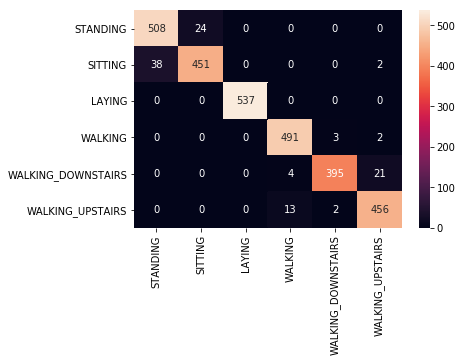

In [162]:
cm = confusion_matrix(y_test, voteclf2.predict(X_test), labels = class_names)
sns.heatmap(cm, annot = True, fmt = "d", xticklabels = class_names, yticklabels = class_names)